# Pre-Processing and Exploratory Data Analysis (EDA)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Pre-Processing-and-Exploratory-Data-Analysis-(EDA)" data-toc-modified-id="Pre-Processing-and-Exploratory-Data-Analysis-(EDA)-1">Pre-Processing and Exploratory Data Analysis (EDA)</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-1.0.0.1">Import Libraries</a></span></li><li><span><a href="#Data-Sources" data-toc-modified-id="Data-Sources-1.0.0.2">Data Sources</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Pre-Processing" data-toc-modified-id="Pre-Processing-2">Pre-Processing</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Step-1:-Null-Values" data-toc-modified-id="Step-1:-Null-Values-2.0.1">Step 1: Null Values</a></span></li><li><span><a href="#Step-2:-Concatenate" data-toc-modified-id="Step-2:-Concatenate-2.0.2">Step 2: Concatenate</a></span></li><li><span><a href="#Step-3:-Add/Drop-Columns" data-toc-modified-id="Step-3:-Add/Drop-Columns-2.0.3">Step 3: Add/Drop Columns</a></span></li><li><span><a href="#Step-4:-Clean-text" data-toc-modified-id="Step-4:-Clean-text-2.0.4">Step 4: Clean text</a></span></li><li><span><a href="#Step-5:-Lemmatizing" data-toc-modified-id="Step-5:-Lemmatizing-2.0.5">Step 5: Lemmatizing</a></span></li></ul></li></ul></li><li><span><a href="#Exploratory-Data-Analysis-(EDA)" data-toc-modified-id="Exploratory-Data-Analysis-(EDA)-3">Exploratory Data Analysis (EDA)</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#CountVectorizer" data-toc-modified-id="CountVectorizer-3.0.1">CountVectorizer</a></span></li><li><span><a href="#N-gram-Range" data-toc-modified-id="N-gram-Range-3.0.2">N-gram Range</a></span></li></ul></li><li><span><a href="#Visualizations" data-toc-modified-id="Visualizations-3.1">Visualizations</a></span><ul class="toc-item"><li><span><a href="#CountVectorized-Datasets" data-toc-modified-id="CountVectorized-Datasets-3.1.1">CountVectorized Datasets</a></span></li><li><span><a href="#CountVectorized-Datasets-w/-Bi-Grams" data-toc-modified-id="CountVectorized-Datasets-w/-Bi-Grams-3.1.2">CountVectorized Datasets w/ Bi-Grams</a></span><ul class="toc-item"><li><span><a href="#Export-Data-to-CSV" data-toc-modified-id="Export-Data-to-CSV-3.1.2.1">Export Data to CSV</a></span></li></ul></li></ul></li></ul></li></ul></div>

Intro to Notebook 3

The subreddits r/schizophrenia and r/dreams have been scraped. The next step is to make sense of all the data. Moreover, the data needs to be organized and calibrated for application in classification models that will be used in Notebook 4. 
<br>
<br>
This notebook (Notebook 3) will format the scraped datasets for an in-depth text analysis to note patterns, commonalities and ultimately, insightful learnings. The analysis intends to highlight the content and context of words used in both subreddits to identify key predictors for differentiating a psychotic episode versus a dream. 
<br>
<br>
This notebook is structured with the following terms...
- <b>Observations</b> : comments on previously printed lines of code. 
- <b>Purpose of the following code</b> : explanation/reason for upcoming lines of code.  
- <b>Interpretation of Visualization</b> : comments on patterns, trends, correlations, etc of previously made data visualization. 

#### Import Libraries

In [1]:
# For plotting, data manipulation, data analysis
import pandas as pd
# For plotting visualization
import seaborn as sns
# For plotting visualization
import matplotlib.pyplot as plt
# For scientific computing   
import numpy as np 
# Natural Language ToolKit
import nltk
# Regular Expressions
import regex as re 

                                     # Access to color options for plots
from matplotlib                      import colors as mcolors
                                     # Parameters for plots
from pylab                           import rcParams
                                     # API for NLP tasks 
from textblob                        import TextBlob, Word
                                     # Dictionary of commonly used words
from nltk.corpus                     import stopwords
                                     # Tally occurrences
from collections                     import Counter
                                     # Parses HTML and XML documents
from bs4                             import BeautifulSoup
                                     # Converts word to meaningful base form
from nltk.stem                       import WordNetLemmatizer
                                     # Convert text to word count vectors (CountVect)
                                     # Convert text to word frequency vectors (Tfidf)
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
                                     # Plots adjust colors to accomodate dark jupyter theme
from jupyterthemes                   import jtplot
jtplot.style(theme= 'gruvboxd', context='notebook', ticks=True, grid=False)

# Displays up to 200 rows when using functions
pd.options.display.max_rows = 200
# Displays up to 200 columns when using functions
pd.options.display.max_columns = 200
# For plotting
%matplotlib inline
# Makes plots look better (resolution)
%config InlineBackend.figure_format = 'retina'
# Automatically saves notebook every 60 seconds
%autosave 60

Autosaving every 60 seconds


#### Data Sources

- <b>subreddit_Dreams.csv</b>: data generated from www.reddit.com/r/Dreams and scraping executed in "Notebook 1_Scrape rDreams" on October 14th, 2019
<br>
<br>
- <b>subreddit_scz.csv</b>: data generated from www.reddit.com/r/schizophrenia and scraping executed in "Notebook 2_Scrape rschizophrenia" on October 14th, 2019

Read in datasets

In [2]:
# Read in scraped subreddit for dreams dataset
df_dreams = pd.read_csv('./subreddit_Dreams.csv')
# Read in scraped subreddit for schizophrenia dataset
df_scz = pd.read_csv('./subreddit_scz.csv')

# Pre-Processing
Transform the data to a useful and efficient format.

In [3]:
# Look at number of rows, columns
df_dreams.shape

(997, 9)

In [4]:
# Look at number of rows, columns
df_scz.shape

(999, 9)

Observations: 
- Both datasets have equal number of columns. 
- Dreams dataset has 3 fewer rows than schizophrenia dataset. 
- Because the datasets are similar in shape/structure, can proceed knowing one dataset won't have a stronger impact than the other in the data analysis at this point. 

In [5]:
df_dreams.head(10)

,Unnamed: 0,title,score,id,subreddit,url,num_comments,body,created
0,0,Just dreamt of the end of the world,135,dhnta6,Dreams,https://www.reddit.com/r/Dreams/comments/dhnta...,18,I just woke from an insanely realistic dream a...,1.571072e+09
1,1,I was accused of blugeoning Beyonce to death i...,9,dhqqyx,Dreams,https://www.reddit.com/r/Dreams/comments/dhqqy...,1,"I was in my local Kroger getting groceries, an...",1.571089e+09
2,2,Morgan Freeman food advice,8,dhr09c,Dreams,https://www.reddit.com/r/Dreams/comments/dhr09...,0,Part of my dream this morning had Morgan Freem...,1.571091e+09
3,3,Violating the nightmare,3,dhucwz,Dreams,https://www.reddit.com/r/Dreams/comments/dhucw...,0,Well uh.. where to begin...\n\nI found this su...,1.571105e+09
4,4,Dreamt was holding my rapist and crying and ap...,2,dhuokx,Dreams,https://www.reddit.com/r/Dreams/comments/dhuok...,0,I don't understand.. I was finally getting bet...,1.571106e+09
5,5,"Zombies, bathrooms and my son (I don't have ki...",3,dhqutz,Dreams,https://www.reddit.com/r/Dreams/comments/dhqut...,0,"I was running around a city in shambles, looki...",1.571090e+09
6,6,"I dreamt of winter, it was creepy and lonely a...",1,dhvzi9,Dreams,https://www.reddit.com/r/Dreams/comments/dhvzi...,0,"I wasn't home, I was somewhere I didn't know. ...",1.571111e+09
7,7,A nightmare I had about a mirror,1,dhvz74,Dreams,https://www.reddit.com/r/Dreams/comments/dhvz7...,0,"So this is my first time posting, but I had th...",1.571111e+09
8,8,Lessons were learned this night.,370,dh9hkr,Dreams,https://i.redd.it/fjfk4sw0pas31.jpg,49,NaN,1.570996e+09
9,9,Negative Dream About Buddha Statues,2,dhs9kk,Dreams,https://www.reddit.com/r/Dreams/comments/dhs9k...,2,"Hey all,\n\nI usually look up dreams on my own...",1.571096e+09


In [6]:
df_scz.head(10)

,Unnamed: 0,title,score,id,subreddit,url,num_comments,body,created
0,0,Frequently Asked Questions (Read This Sticky),41,53xfmu,schizophrenia,https://www.reddit.com/r/schizophrenia/comment...,7,Welcome to [/r/schizophrenia](https://www.redd...,1.474549e+09
1,1,The latest :),68,dhouqp,schizophrenia,https://i.redd.it/dhg7lm4wkhs31.jpg,10,NaN,1.571079e+09
2,2,Hurting loved ones,10,dhsf49,schizophrenia,https://www.reddit.com/r/schizophrenia/comment...,10,korba went insane for about a month. big surpr...,1.571097e+09
3,3,Today I saw a lot of strange sparkly dust fall...,42,dhmke5,schizophrenia,https://www.reddit.com/r/schizophrenia/comment...,10,NaN,1.571063e+09
4,4,Im getting so fat...,5,dhtybm,schizophrenia,https://www.reddit.com/r/schizophrenia/comment...,11,I'm on risperdone. Is there a schizophrenia me...,1.571103e+09
5,5,Self harm linked with schizophrenia,5,dhtprt,schizophrenia,https://www.reddit.com/r/schizophrenia/comment...,3,I don't know how clearly j can explain this bu...,1.571102e+09
6,6,I've seen a lot others posting art inspired by...,3,dhuqw7,schizophrenia,https://imgur.com/a/XgSwqgC,1,NaN,1.571106e+09
7,7,4eyes (art),33,dhlun8,schizophrenia,https://i.redd.it/85m8k8f3vfs31.jpg,4,NaN,1.571058e+09
8,8,Is it really split personalities or am I just ...,3,dhufui,schizophrenia,https://www.reddit.com/r/schizophrenia/comment...,8,NaN,1.571105e+09
9,9,He thinks I’m a government agent,10,dhpigt,schizophrenia,https://www.reddit.com/r/schizophrenia/comment...,4,I’m stuck. I’m dating this guy with schizoaffe...,1.571083e+09


Observations: 
- The 'title' and 'body' columns are dense in text and therefore may be the best for text analysis. 
- Columns to be dropped after concatenating: 'Unnamed', 'score', 'id', 'url', 'created', 'num_comments'. 
  - Better to drop after concatenating as it is more efficient in applying drop() function to both subreddit values all at once rather write extra lines of code to apply drop to two individual datasets. 
- There are inconsistent symbols (e.g. ':)') and numbers mixed in with signs such as parantheses that will need to be cleaned from the datasets.
- There are NaN values in 'body' column. Will need to check if null values exist in other columns.

### Step 1: Null Values

In [7]:
# Check for null values in dreams dataset
df_dreams.isnull().sum()

Unnamed: 0       0
title            0
score            0
id               0
subreddit        0
url              0
num_comments     0
body            90
created          0
dtype: int64

In [8]:
# Check for null values in schizophrenia dataset
df_scz.isnull().sum()

Unnamed: 0        0
title             0
score             0
id                0
subreddit         0
url               0
num_comments      0
body            201
created           0
dtype: int64

There are null values found only in 'body' column.

In [9]:
# Fill null values for both datasets
df_dreams['body'].fillna(value="", inplace=True)
df_scz['body'].fillna(value="", inplace=True)

### Step 2: Concatenate

In [10]:
# Concatenate both dataframes for easier cleaning
df_subreddits = pd.concat([df_dreams, df_scz])

# Check to see if total number of rows equals rows from both subreddits
df_subreddits

,Unnamed: 0,title,score,id,subreddit,url,num_comments,body,created
0,0,Just dreamt of the end of the world,135,dhnta6,Dreams,https://www.reddit.com/r/Dreams/comments/dhnta...,18,I just woke from an insanely realistic dream a...,1.571072e+09
1,1,I was accused of blugeoning Beyonce to death i...,9,dhqqyx,Dreams,https://www.reddit.com/r/Dreams/comments/dhqqy...,1,"I was in my local Kroger getting groceries, an...",1.571089e+09
2,2,Morgan Freeman food advice,8,dhr09c,Dreams,https://www.reddit.com/r/Dreams/comments/dhr09...,0,Part of my dream this morning had Morgan Freem...,1.571091e+09
3,3,Violating the nightmare,3,dhucwz,Dreams,https://www.reddit.com/r/Dreams/comments/dhucw...,0,Well uh.. where to begin...\n\nI found this su...,1.571105e+09
4,4,Dreamt was holding my rapist and crying and ap...,2,dhuokx,Dreams,https://www.reddit.com/r/Dreams/comments/dhuok...,0,I don't understand.. I was finally getting bet...,1.571106e+09
...,...,...,...,...,...,...,...,...,...
994,994,Side effects from antipchycotics,5,d4q7ru,schizophrenia,https://www.reddit.com/r/schizophrenia/comment...,4,About two weeks ago i was injected a high dose...,1.568609e+09
995,995,Any studies of ppl who quit meds after long use?,3,d4s9eq,schizophrenia,https://www.reddit.com/r/schizophrenia/comment...,4,Big brother stopped taking his meds after bein...,1.568618e+09
996,996,"""Spider-Man: Far from Home"" is mega triggering.",24,d4jaj6,schizophrenia,https://www.reddit.com/r/schizophrenia/comment...,4,"I just got about halfway through ""Spider-Man: ...",1.568576e+09
997,997,Supporting Fiancé,4,d4qhxu,schizophrenia,https://www.reddit.com/r/schizophrenia/comment...,1,How do I support my fiancé who has paranoid de...,1.568610e+09


Purpose of code: Reset index after concatenating, or else the rows will stack on top of one another and as a result, the number of rows will not equate the accurate number of rows. Instead, it will base its row numbers on original dataframe rows. For example, 1-100 will stack on top of 1-100. 

In [11]:
# Reset index 
df_subreddits.reset_index(drop = True, inplace = True)

### Step 3: Add/Drop Columns

Purpose of code: Subreddits need to be assigned a numeric value since binary(i.e. binary numeral system representations of 0 and 1) classification models can only take in binary values.

In [12]:
# Add new 'label' column that assigns numeric 0 and 1 to distinguish between subreddits
df_subreddits['subreddit_label'] = df_subreddits['subreddit'].map({'Dreams':0,'schizophrenia':1})

Purpose of code: 'title' and 'body' columns are the most dense with text, rendering the other columns not as useful for overall text analysis. 

In [13]:
# Drop columns that will not be useful in text analysis 
df_subreddits.drop(df_subreddits[['Unnamed: 0', 'score','id', 'url', 'created', 'num_comments']].columns, axis = 1, inplace=True)

In [14]:
# Take a look at data types and if they're all appropriate for given column values
df_subreddits.dtypes

title              object
subreddit          object
body               object
subreddit_label     int64
dtype: object

Observations: 
- Columns (title', 'subreddit', 'body') contain mostly words and therefore has appropriate object data type.
- 'subreddit_label' recently created to assign numeric values so int64 is appropriate data type.

Purpose of code: Posts which contain less than 4 words/items as post may be too short in length to provide valuable insight. 

In [15]:
# Find posts that have less than than 4 words/items in 'title' column
[post for post in df_subreddits['title']if len(post) < 4]

['B', '🏞', 'Why', 'Hi!', 'Hey', 'Rot']

In [16]:
# Find posts that have less than than 4 words/items in 'body' column
[post for post in df_subreddits['body']if len(post) < 4]

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 ':(',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '...',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',


Observations:
- Emoji '🏞' found and should be removed from 'title' column.
  - Emojis may have ambiguous definitions and therefore unclear in its interpretation.
- There's an elipses and empty strings in body. Columns 'title' and 'body' may be combined to summarize overall text 'content' that will be analyzed. 

In [17]:
# Find exact row where unique value emoji is 
df_subreddits[df_subreddits['title'] == '🏞']

,title,subreddit,body,subreddit_label
992,🏞,Dreams,,0


Purpose of code: Removing emoji since it clutters the text and resetting index similar to when datasets were first concatenated.

In [18]:
# Dropping row with unique value and then resetting index
df_subreddits = df_subreddits[df_subreddits['title'] != '🏞']
# Reset index because dropping row affects total number of original numbered rows
df_subreddits.reset_index(drop = True, inplace = True)

Purpose of code: Concatenating 'title' and 'body' columns since they both contain similar text that is to be overall analyzed. 

In [19]:
# Add new content column by concatenating columns body and title for easier cleaning
df_subreddits.loc[:,'content'] = df_subreddits.loc[:,'title'] + ' ' + df_subreddits.loc[:,'body']
# Print to double check 'content' column added to dataframe
df_subreddits.head()

//anaconda3/envs/dsi/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
//anaconda3/envs/dsi/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,title,subreddit,body,subreddit_label,content
0,Just dreamt of the end of the world,Dreams,I just woke from an insanely realistic dream a...,0,Just dreamt of the end of the world I just wok...
1,I was accused of blugeoning Beyonce to death i...,Dreams,"I was in my local Kroger getting groceries, an...",0,I was accused of blugeoning Beyonce to death i...
2,Morgan Freeman food advice,Dreams,Part of my dream this morning had Morgan Freem...,0,Morgan Freeman food advice Part of my dream th...
3,Violating the nightmare,Dreams,Well uh.. where to begin...\n\nI found this su...,0,Violating the nightmare Well uh.. where to beg...
4,Dreamt was holding my rapist and crying and ap...,Dreams,I don't understand.. I was finally getting bet...,0,Dreamt was holding my rapist and crying and ap...


### Step 4: Clean text
Executing the following actions in order to create consistency in the text:
- Remove punctuation
- Replace underscores
- Expand contraction words
- Remove URL
- Remove HTML
- Remove digits/numbers
- Convert text to lowercase
- Remove stopwords 

Purpose of code: To initially do a simple analysis, the text is will be converted to a simplified state, which means no punctuation, no shortened words/contraction words, no uppercased letters and ignoring proper nouns.

In [20]:
# Use regular expressions and replace() function to remove punctuation and replace with empty space
df_subreddits.loc[:,'content'] = df_subreddits.loc[:,'content'].str.replace('[^\w\s]'," ")
# Print to double check punctuation was successfully removed
df_subreddits['content']

0       Just dreamt of the end of the world I just wok...
1       I was accused of blugeoning Beyonce to death i...
2       Morgan Freeman food advice Part of my dream th...
3       Violating the nightmare Well uh   where to beg...
4       Dreamt was holding my rapist and crying and ap...
                              ...                        
1990    Side effects from antipchycotics About two wee...
1991    Any studies of ppl who quit meds after long us...
1992     Spider Man  Far from Home  is mega triggering...
1993    Supporting Fiancé How do I support my fiancé w...
1994    There s another reality and I know it I know t...
Name: content, Length: 1995, dtype: object

In [21]:
# Use replace() function to replace any underscores with a white space
df_subreddits.loc[:,'content'] = df_subreddits.loc[:,'content'].str.replace('_', ' ')

In [22]:
# Create a function to return expanded contraction words for consistency of words in text
def expand_contractions(sentence):
    # Use regex to find contraction words in sentence to expand
    
    # Expand any word with 're (e.g. you're, we're)
    sentence = re.sub(r"\'re", " are", sentence)
    # Expand any word with 's (e.g. it's, there's)
    sentence = re.sub(r"\'s", " is", sentence)
    # Expand any word with 'd (e.g. i'd, there'd)
    sentence = re.sub(r"\'d", " would", sentence)
    # Expand any word with 'll (e.g. i'll, you'll)
    sentence = re.sub(r"\'ll", " will", sentence)
    # Expand any word with 't (e.g. can't, don't)
    sentence = re.sub(r"\'t", " not", sentence)
    # Expand any word with 've (e.g. we've, they've)
    sentence = re.sub(r"\'ve", " have", sentence)
    # Expand any word with 'm (e.g. i'm)
    sentence = re.sub(r"\'m", " am", sentence)
    return sentence

In [23]:
# Apply expand_contractions function to content column
df_subreddits.loc[:,'content'] = df_subreddits.apply(lambda x: expand_contractions(x['content']), axis = 1)

Purpose of code: Because dream language is predominantly without URL, URL would not be useful to add to reference for compiled dream language. URL is noise to the data and so needs to be removed.

In [24]:
# Use regular expressions and replace() function to remove any URL
df_subreddits['content'].replace(r'http\S+', ' ', regex=True).replace(r'www\S+', ' ', regex=True)

0       Just dreamt of the end of the world I just wok...
1       I was accused of blugeoning Beyonce to death i...
2       Morgan Freeman food advice Part of my dream th...
3       Violating the nightmare Well uh   where to beg...
4       Dreamt was holding my rapist and crying and ap...
                              ...                        
1990    Side effects from antipchycotics About two wee...
1991    Any studies of ppl who quit meds after long us...
1992     Spider Man  Far from Home  is mega triggering...
1993    Supporting Fiancé How do I support my fiancé w...
1994    There s another reality and I know it I know t...
Name: content, Length: 1995, dtype: object

Purpose of code: After some thought, because there are multiple cleaning steps to be done, it may be more efficient to run a function that can apply multiple cleaning tasks to text in one go.

In [25]:
# Create function to do lots of cleaning all at once
def clean(uncleaned_text):
    # Remove HTML 
    all_content = BeautifulSoup(uncleaned_text).get_text()
    # Remove anything that isn't a letter or a number
    letters_text = re.sub('/^[A-Za-z]{1,10}$/', ' ', all_content)
    # Remove anything that is a digit/number
    letters_text = re.sub('\d', ' ', all_content) 
    # Convert to lowercase 
    words = letters_text.lower().split()
    # Convert stop words to set
    stops = set(stopwords.words('english'))
    # Remove stop words
    keep_words = [word for word in words if not word in stops]
    return(' '.join(keep_words))

In [26]:
# Apply clean() function to 'content' column
df_subreddits.loc[:,'content'] = df_subreddits.apply(lambda x: clean(x['content']), axis = 1)
# Print content column to double check column was successfully cleaned
df_subreddits['content']

0       dreamt end world woke insanely realistic dream...
1       accused blugeoning beyonce death kroger local ...
2       morgan freeman food advice part dream morning ...
3       violating nightmare well uh begin found sub go...
4       dreamt holding rapist crying apologizing makin...
                              ...                        
1990    side effects antipchycotics two weeks ago inje...
1991    studies ppl quit meds long use big brother sto...
1992    spider man far home mega triggering got halfwa...
1993    supporting fiancé support fiancé paranoid delu...
1994    another reality know know another reality one ...
Name: content, Length: 1995, dtype: object

Observations: 
The following actions were successfully applied and captured in 'content' column...
- Removed punctuation
- Replace underscores
- Expanded contraction words
- Removed URL
- Removed HTML
- Removed digits/numbers
- Converted text to lowercase
- Removed stopwords 

### Step 5: Lemmatizing
To condense words from their inflectional form to their common base form without losing too much context, text to undergo lemmatization. 
<br>
<br>
It's important to note that lemmatization is being used and not stemming as language used to describe dreams depends on lexical knowledge. 

In [27]:
# Use lemmatize to group words by base form of word based on context
df_subreddits.loc[:,'content'] = df_subreddits.loc[:,'content'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

# Exploratory Data Analysis (EDA)

It's important to visually see patterns in the data to understand the features that may impact the classification models in predicting an episode versus a dream.
<br>
<br>
The following tools will be used to take a closer look at the data...
- CountVectorizer
- N-gram (word length)
- Sentiment Analysis
- Visualizations

### CountVectorizer

This method will convert the text to a matrix of token counts. This means it will count the number of occurrences for a given word and return a numerical representation. 

This method also removes punctuation and lowercases letters. During the cleaning text process (see Step 4 above), punctuation was removed and letters lowercased as it was not foreseen that CountVectorizer would be used in EDA. It was only after considering the length of words would provide adequate insight, was it decided that CountVectorizer would be needed.

Purpose of code: Added custom stop words to be accounted for in addition to default stop words (i.e. words so commonly used that they are noise to data), so as to output words that have stronger contextual meanings in describing dreams and schizophrenic episodes. 
<br>
<br>
The goal is to equip the classification models with features that do not provide model with a strong advantage in predicting one direction or the other. If model has strong advantages, the results can be skewed with inaccuracy. 
<br>
<br>
Words that would be dead giveaways for subreddit label...
- schizophrenia
- schizophrenic
- dreams
- dream
<br>

Words that can offer little insight...
- really
- get
- thing
- reddit

In [28]:
# Instantiate a CountVectorizer with custom stopwords
cvec = CountVectorizer(stop_words=['schizophrenia', 'schizophrenic', 'dreams', 'dream', 'really', 'get', 'thing', 'reddit'])

In [29]:
# Use CountVectorizer for dreams subreddit
cvec.fit(df_subreddits[df_subreddits['subreddit_label']== 0]['content'])
# Use .transform method to return matrix of word occurrences  
cv_trans = cvec.transform(df_subreddits[df_subreddits['subreddit_label']== 0]['content'])

# Create a new dataframe for CountVectorized values and .todense() function to save memory 
df_cv_dreams = pd.DataFrame(cv_trans.todense(),
# Make columns the names of the words that are being tallied for number of occurrences
                          columns=cvec.get_feature_names())
# Print new dataframe to confirm Countvectorized words from 'content' column for dreams label
df_cv_dreams

,aaaand,aang,ab,abandon,abandoned,abandonment,abbey,abbie,abby,abd,abdomen,abducted,abide,ability,ablaze,able,abnormal,aboard,aborted,abortion,abroad,abruptly,absence,absent,absolute,absolutely,absorbed,abstract,absurd,abt,abundance,abundant,abuse,abused,abusing,abusive,abyss,abyssal,ac,academy,accelerating,accelerator,accent,accept,acceptance,accepted,accepting,accepts,access,accessibilty,accessible,accessory,accident,accidentally,accompained,accompanied,accompany,accompanying,accomplish,accomplished,according,accordingly,accordion,account,accumulate,accuracy,accurate,accurately,accused,ache,achieve,acid,acknowledge,acknowledged,acknowledges,acquaintance,acquainted,acquaintence,acquired,acquiring,acrobatic,across,act,acted,acting,action,activate,activating,active,actively,activity,actor,actual,actuality,actually,actualy,ad,adam,adavntage,add,...,worshipped,worst,worth,worthless,would,wouldnt,wouldve,wound,wounded,woven,wow,woz,wrack,wrap,wrapped,wrapping,wreck,wreckage,wrecking,wrenching,wrestle,wrestling,wrinkled,wrist,write,writer,writhing,writing,written,wrong,wrongdoing,wronged,wrongness,wrote,wtf,ww,wwe,wwnt,www,xbox,xoxoxo,xr,xray,xxxtentacion,ya,yadda,yah,yall,yank,yanked,yard,yarn,ye,yea,yeah,year,yell,yelled,yelling,yellow,yellowed,yellowish,yep,yes,yesterday,yet,yielding,yknow,yo,yoink,york,young,younger,youngest,youre,youth,youtu,youtube,yr,yt,yubaba,yukkako,yup,zack,zapper,zealand,zelda,zero,zodiac,zombie,zoned,zoo,zookeeper,zookeepers,zoom,zoomed,zooming,zoro,zwooped,zws
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

Observations: There are words with extra letters such as "aaaand". Does not need to be replaced with correct spelling "and" at this point. It may or may not appear as the top most frequent words used, and if it is, that's still valuable insight that should be recorded and not manipulated. 

Purpose of code: Provide a list of the most popular words that have appeared greater than 200 times with subreddit label dreams. 200 is an arbitrarily chosen number, however, given the dataset has 996 rows, 200 is close to a quarter of the rows and therefore seems like a fair number to proportionately derive valuable insight.

In [30]:
# Take a look at words that appear more than 200 times for dreams subreddit
df_cv_dreams.sum().sort_values(ascending=False)[df_cv_dreams.sum().sort_values(ascending=False) > 200]

like         1596
one           907
know          640
time          636
back          583
remember      541
see           537
could         530
people        511
something     463
go            459
would         452
around        423
woke          417
friend        408
night         396
started       392
feel          383
felt          373
room          362
house         353
last          351
said          347
think         344
life          340
got           340
still         338
real          338
went          336
even          331
going         329
never         322
way           309
first         301
looked        300
weird         292
start         287
door          282
look          282
year          280
girl          277
eye           276
also          268
wake          257
say           250
saw           249
someone       249
right         249
guy           249
come          243
mean          239
away          237
looking       237
trying        236
day           232
end       

In [31]:
# Use CountVectorizer for schizophrenia subreddit
cvec.fit(df_subreddits[df_subreddits['subreddit_label']== 1]['content'])
# Use .transform method to return matrix of word occurrences  
cv_trans = cvec.transform(df_subreddits[df_subreddits['subreddit_label']== 1]['content'])

# Create a new dataframe for CountVectorized values and .todense() function to save memory 
df_cv_schizophrenia = pd.DataFrame(cv_trans.todense(),
# Make columns the names of the words that are being tallied for number of occurrences
                          columns=cvec.get_feature_names())
# Print new dataframe to confirm Countvectorized words from 'content' column for schizophrenia label
df_cv_schizophrenia 

,aa,aaahahahahahababbbbbhh,abandon,abandoned,abandonment,abduction,abhor,abilfy,abilify,ability,abit,abject,able,abnormality,abnoxious,abroad,abrupt,absence,absolute,absolutely,abstaining,abstract,abstraction,absurd,abuse,abused,abuser,abusing,abusive,abyss,ac,academically,accept,acceptability,acceptable,acceptance,accepted,accepting,accepts,access,accessible,accessing,accident,accidental,accidentally,accommodation,accompanied,accomplishing,accomplishment,accord,according,accordingly,account,accumulating,accumulation,accuracy,accurate,accurately,accusation,accuse,accused,accusing,acetyl,acetylcysteine,ache,achieve,achievement,achy,acid,acknowledge,acknowledgement,acquaintance,acquire,across,act,acted,acting,action,activate,activated,activation,active,actively,activity,actor,actual,actualization,actually,acute,ad,adamant,adapted,adapting,add,added,adderal,adderall,addict,addicted,addicting,...,workout,workplace,worksheet,world,worldly,worldview,worm,worried,worrisome,worry,worrying,worse,worsen,worsened,worsening,worsens,worst,worth,worthless,worthlessness,worthwhile,worthy,would,wouldnt,wound,wounded,woundering,woven,wow,wracking,wrap,wrapped,wrapping,wrathful,wreck,wrecked,wretched,wrinkled,write,writer,writing,written,writting,wrong,wrote,wsnt,wtf,wv,wwll,www,xanax,xeplion,xfmu,xl,xoxo,xr,ya,yada,yall,yanked,yard,yarn,yay,yeah,year,yearning,yeh,yell,yelled,yelling,yellow,yep,yes,yesterday,yet,yield,yo,yoga,york,young,younger,youre,yous,youse,youth,youtube,youve,yugioh,zelda,zero,zinc,zip,znks,zoloft,zombie,zone,zooloft,zpwrmvs,zyprexa,ʔs
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,10,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

Observations: "aa" and "aaahahahahahaahbbbbbhh" are words that seem to have extra letters". Does not need to be replaced with any attempt at a correct spelling or dropped at this point. It may or may not appear as the top most frequent words used, and if it is, that's still valuable insight that should be recorded and not manipulated. 

Purpose of code: Provide a list of the most popular words that have appeared greater than 200 times with subreddit label schizophrenia. 200 is an arbitrarily chosen number, however, given the dataset has 999 rows, 200 is close to a quarter of the rows and therefore seems like a fair number to proportionately derive valuable insight.

In [32]:
# Take a look at words that appear more than 200 times for schizophrenia subreddit
df_cv_schizophrenia.sum().sort_values(ascending=False)[df_cv_schizophrenia.sum().sort_values(ascending=False) > 200]

like         756
feel         515
know         449
time         403
people       391
want         347
think        344
thought      330
one          325
voice        302
day          302
going        279
anyone       274
go           266
even         257
help         249
would        235
see          233
make         230
year         224
life         224
something    208
dtype: int64

### N-gram Range

Observations: 
- The Dreams subreddit has more words that appear more than 200 times versus schizophrenia subreddit which has only a little over 20 words that appear more than 200 times.
- Individual words provide some perspective, however, individual words can lack context. Perhaps, looking into the coupling of words will offer additional insight.

Purpose of code: Set n-gram range to account for every 2 words (aka bigrams).

In [33]:
# Instantiate CountVectorizer with custom stopwords and n-gram range
cvec_ngram = CountVectorizer(stop_words=['schizophrenia', 'schizophrenic', 'dream', 'dreams', 'really', 'get', 'thing', 'reddit', 'www', 'com'], ngram_range=(2,2))

In [34]:
# Use CountVectorizer w/ Bi-Grams for dreams subreddit
cvec_ngram.fit(df_subreddits[df_subreddits['subreddit_label']== 0]['content'])
# Use .transform method to return matrix of word occurrences  
cvn_trans = cvec_ngram.transform(df_subreddits[df_subreddits['subreddit_label']== 0]['content'])

# Create a new dataframe for Bi-Grams and .todense() function to save memory 
df_cvn_dreams = pd.DataFrame(cvn_trans.todense(),
# Make columns the names of the words that are being tallied for number of occurrences
                          columns=cvec_ngram.get_feature_names())

# Print to see Bi-Grams dataframe
df_cvn_dreams

,aaaand thats,aang time,ab despite,abandon car,abandon chased,abandon family,abandoned balcony,abandoned bloody,abandoned feeling,abandoned furnished,abandoned house,abandoned mining,abandoned people,abandoned thought,abandoned wood,abandonment feeling,abbey dad,abbey dead,abbie dating,abbie dominating,abbie ground,abby bought,abd started,abdomen feel,abdomen jutting,abdomen navel,abdomen next,abdomen pressed,abdomen shuttering,abdomen tattoo,abducted thrown,abide territory,ability act,ability analyze,ability anyone,ability change,ability come,ability consume,ability control,ability create,ability discovered,ability heal,ability led,ability manifest,ability remember,ability see,ability sometimes,ability swing,ablaze explosion,able achieve,able ahold,able answer,able anything,able baby,able back,able breath,able breathe,able calmly,able cast,able change,able clearly,able commit,able confront,able control,able cross,able defend,able done,able easily,able enter,able escape,able find,able finish,able fly,able follow,able forget,able give,able go,able handle,able hear,able help,able hide,able high,able information,able interpret,able interview,able join,able keep,able kept,able kill,able kind,able learn,able lock,able lucid,able make,able move,able next,able nice,able nurse,able properly,able realise,...,youtube thestateofconsciousness,youtube video,youtube visibly,youtube watch,yr ago,yr grandmother,yr married,yr old,yr physic,yt channel,yubaba changed,yubaba spirited,yup listen,yup place,yup strong,zack gave,zapper kind,zealand sat,zelda game,zelda link,zero blasted,zero favorite,zero food,zero man,zero megaman,zero sensation,zodiac sign,zombie actually,zombie apocalypse,zombie area,zombie ask,zombie attack,zombie back,zombie bathroom,zombie behind,zombie blood,zombie build,zombie burglar,zombie came,zombie certain,zombie chasing,zombie coming,zombie creature,zombie crowd,zombie descend,zombie eaten,zombie eating,zombie even,zombie everywhere,zombie felt,zombie freeze,zombie germ,zombie getting,zombie girl,zombie got,zombie happened,zombie hard,zombie heavy,zombie inside,zombie keep,zombie killing,zombie let,zombie like,zombie longer,zombie massacre,zombie move,zombie normal,zombie outside,zombie people,zombie picture,zombie place,zombie protect,zombie ran,zombie right,zombie say,zombie see,zombie sound,zombie soundtrack,zombie speak,zombie start,zombie started,zombie still,zombie story,zombie torn,zombie trust,zombie try,zombie typical,zombie uno,zombie weird,zoned comment,zoo looking,zookeeper job,zookeepers like,zoom eye,zoom swore,zoomed face,zoomed view,zooming around,zoro lost,zwooped back
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [35]:
# Use CountVectorizer w/ Bi-Grams for schizophrenia subreddit
cvec_ngram.fit(df_subreddits[df_subreddits['subreddit_label']== 1]['content'])
# Use .transform method to return matrix of word occurrences
cvn_trans = cvec_ngram.transform(df_subreddits[df_subreddits['subreddit_label']== 1]['content'])

# Create a new dataframe for Bi-Grams and .todense() function to save memory 
df_cvn_schizophrenia = pd.DataFrame(cvn_trans.todense(),
# Make columns the names of the words that are being tallied for number of occurrences
                          columns=cvec_ngram.get_feature_names())

# Print to see Bi-Grams dataframe
df_cvn_schizophrenia 

,aa long,abandon friend,abandon thinking,abandon whenever,abandoned alone,abandoned must,abandoned parking,abandoned therapist,abandoned thought,abandonment prejudice,abduction tactile,abhor drive,abhor realise,abilfy unfortunately,abilfy would,abilify also,abilify apparently,abilify chilling,abilify felt,abilify injection,abilify ironically,abilify last,abilify maintena,abilify make,abilify mg,abilify next,abilify olanzapine,abilify part,abilify per,abilify perphenazine,abilify pill,abilify see,abilify seems,abilify shot,abilify thigh,ability anything,ability care,ability choice,ability choose,ability contemplate,ability feel,ability feeling,ability function,ability inscription,ability insight,ability interested,ability noticeably,ability talk,ability thanks,ability think,abit different,abject poverty,able afford,able analyze,able anything,able breathe,able buy,able calm,able communicate,able continue,able control,able discern,able drive,able enjoy,able even,able ever,able fit,able fun,able function,able give,able go,able hope,able judge,able keep,able know,able literally,able made,able make,able manage,able move,able notice,able one,able physically,able project,able recover,able relate,able say,able see,able seen,able sleep,able smoke,able something,able speak,able started,able stay,able stop,able study,able sustain,able take,able talk,...,yet fill,yet find,yet first,yet got,yet irritating,yet ive,yet king,yet know,yet learnt,yet mental,yet nearing,yet people,yet prove,yet recognized,yet recruited,yet see,yet somehow,yet wanna,yet want,yet went,yet whole,yield positive,yo waddup,yo woman,yoga class,yoga easy,yoga taught,york check,young age,young child,young girl,young guy,young happens,young like,young prescribed,young restless,younger always,younger brother,younger either,younger tell,younger tried,youre medicated,yous miss,youse think,youth problem,youtube boring,youtube channel,youtube documentary,youtube helped,youtube name,youtube video,youtube watch,youtube whatever,youve done,yugioh card,zelda sprinkled,zero follower,zero idea,zero interest,zero many,zero sense,zero social,zero tolerance,zero treatment,zinc magnesium,zinc make,zinc read,zinc supplement,zip view,znks ohqeac,zoloft mg,zombie according,zombie anymore,zombie anyone,zombie anything,zombie apocalypse,zombie first,zombie forever,zombie freak,zombie like,zombie lock,zombie still,zombie woken,zone go,zone kill,zooloft amitriptyline,zpwrmvs hoping,zyprexa eating,zyprexa go,zyprexa injection,zyprexa last,zyprexa made,zyprexa night,zyprexa oxetol,zyprexa psychotic,zyprexa realistic,zyprexa saw,zyprexa thereafter,zyprexa time,ʔs iː
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

Observations: Looks like bigrams did provide more insight, but it's easier to observe the word pairs by plotting visuals so visualizations should be conducted in the upcoming code lines. 

Purpose of code: Before hopping into visualizations, take a look at outliers- words that have greater than 16 letters. 

Because the average number of letters in an English word has 6 and 'schizophreniacs' has 15 letters, it made sense that possible outlier words would have more than 16 letters.

In [36]:
# Create 'for loop' to run through each row in CountVectorized dataframe for dreams subreddit
for col in df_cv_dreams:
    # 'for loop' to find all words that have more/greater than 17 letters
    if len(col) > 16:
        # Print the words that have more/greater than 17 letters
        print(col)

iamgoingtobeengagedonjune
misinterpretation
neuroendocrinologist
postyourfunnyndreamshere
poweeeeeeeeeeeeeeeeeeeerrrrrr
thestateofconsciousness


Observations: 
- Several of the printed words look to have made sense if there were spaces in between. This could have been caused my reddit user error, or it's possible during the cleaning text process, punctuation was what seperated the words and when it was taken out, the words bunched together. 
- 'misinterpretation' and 'neuroendocrinologist' are legitimate words and it does not seem unusual to have them in a dreams subreddit.

In [37]:
# Create 'for loop' to run through each row in CountVectorized dataset for schizophrenia subreddit
for col in df_cv_schizophrenia:
    # 'for loop' to find all words that have more/greater than 17 letters
    if len(col) > 16:
        # Print the words that have more/greater than 17 letters
        print(col)

aaahahahahahababbbbbhh
chilloutalreadyofficial
depersonalization
fightingpsychosis
indistinguishable
institutionalized
missunderstanding
mydarkandholytwistedfantasy
psychopharmacology
psychotherapeutic
tallyschizophreniatrial
teleccomunications
thoughtprocessies
visualizationchip


Observations:
- Several of the words look to have made sense if there were spaces in between. This could have been caused my reddit user error, or it's possible during the cleaning text process, punctuation was what seperated the words and when it was taken out, the words bunched together. 
- Several of the wordsare misspelled('missunderstanding' , 'teleccomunications', 'thoughtprocesses'). 
- There were no incorrect spellings found in subreddit dreams of words with more than 16 letters.
- schizophrenia subreddit has a few more words with longer than 16 letters compared to dreams subreddit.

## Visualizations

In [38]:
# Run colors dictionary for plotting
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

### CountVectorized Datasets

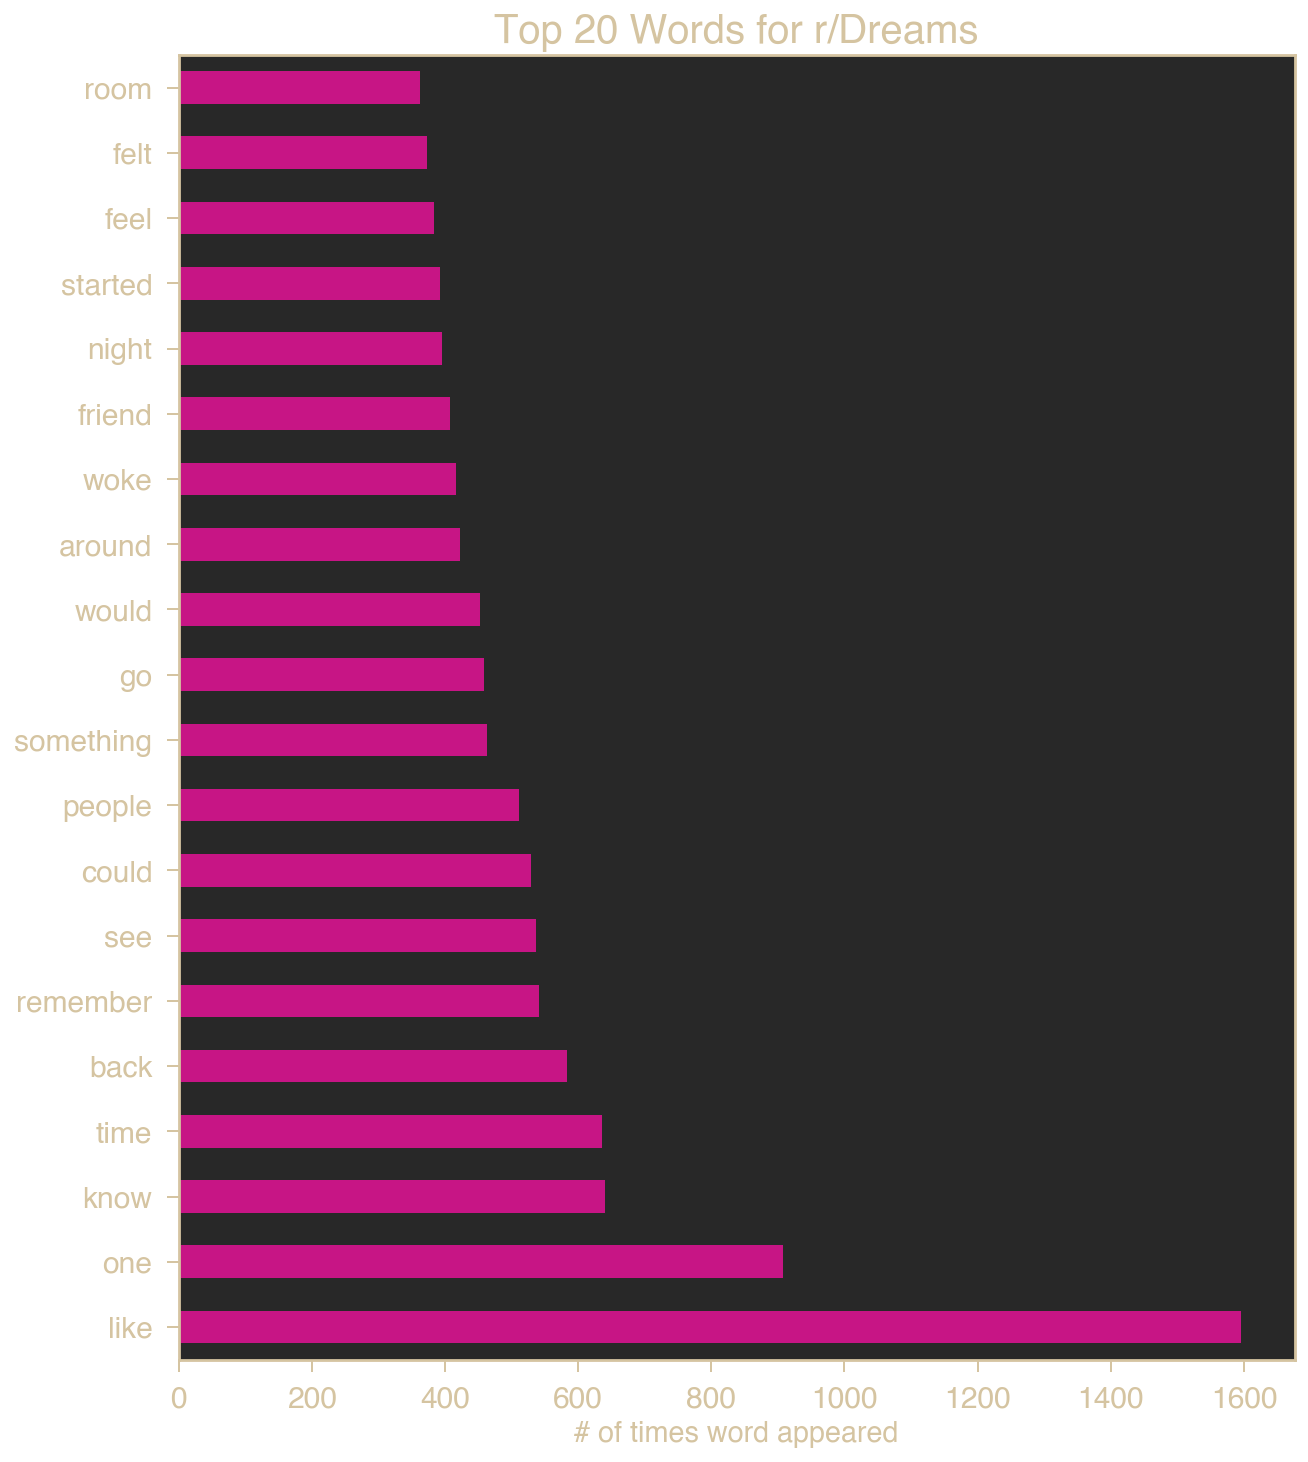

In [39]:
# Plot visualization for the Top 20 words that frequent more than 200 times in dreams subreddit
ax = df_cv_dreams.sum().sort_values(ascending=False).head(20).plot(kind='barh', figsize=(10,12),
                                                                   color="mediumvioletred", fontsize=15)
ax.set_title("Top 20 Words for r/Dreams", fontsize=20)
ax.set_xlabel('# of times word appeared');

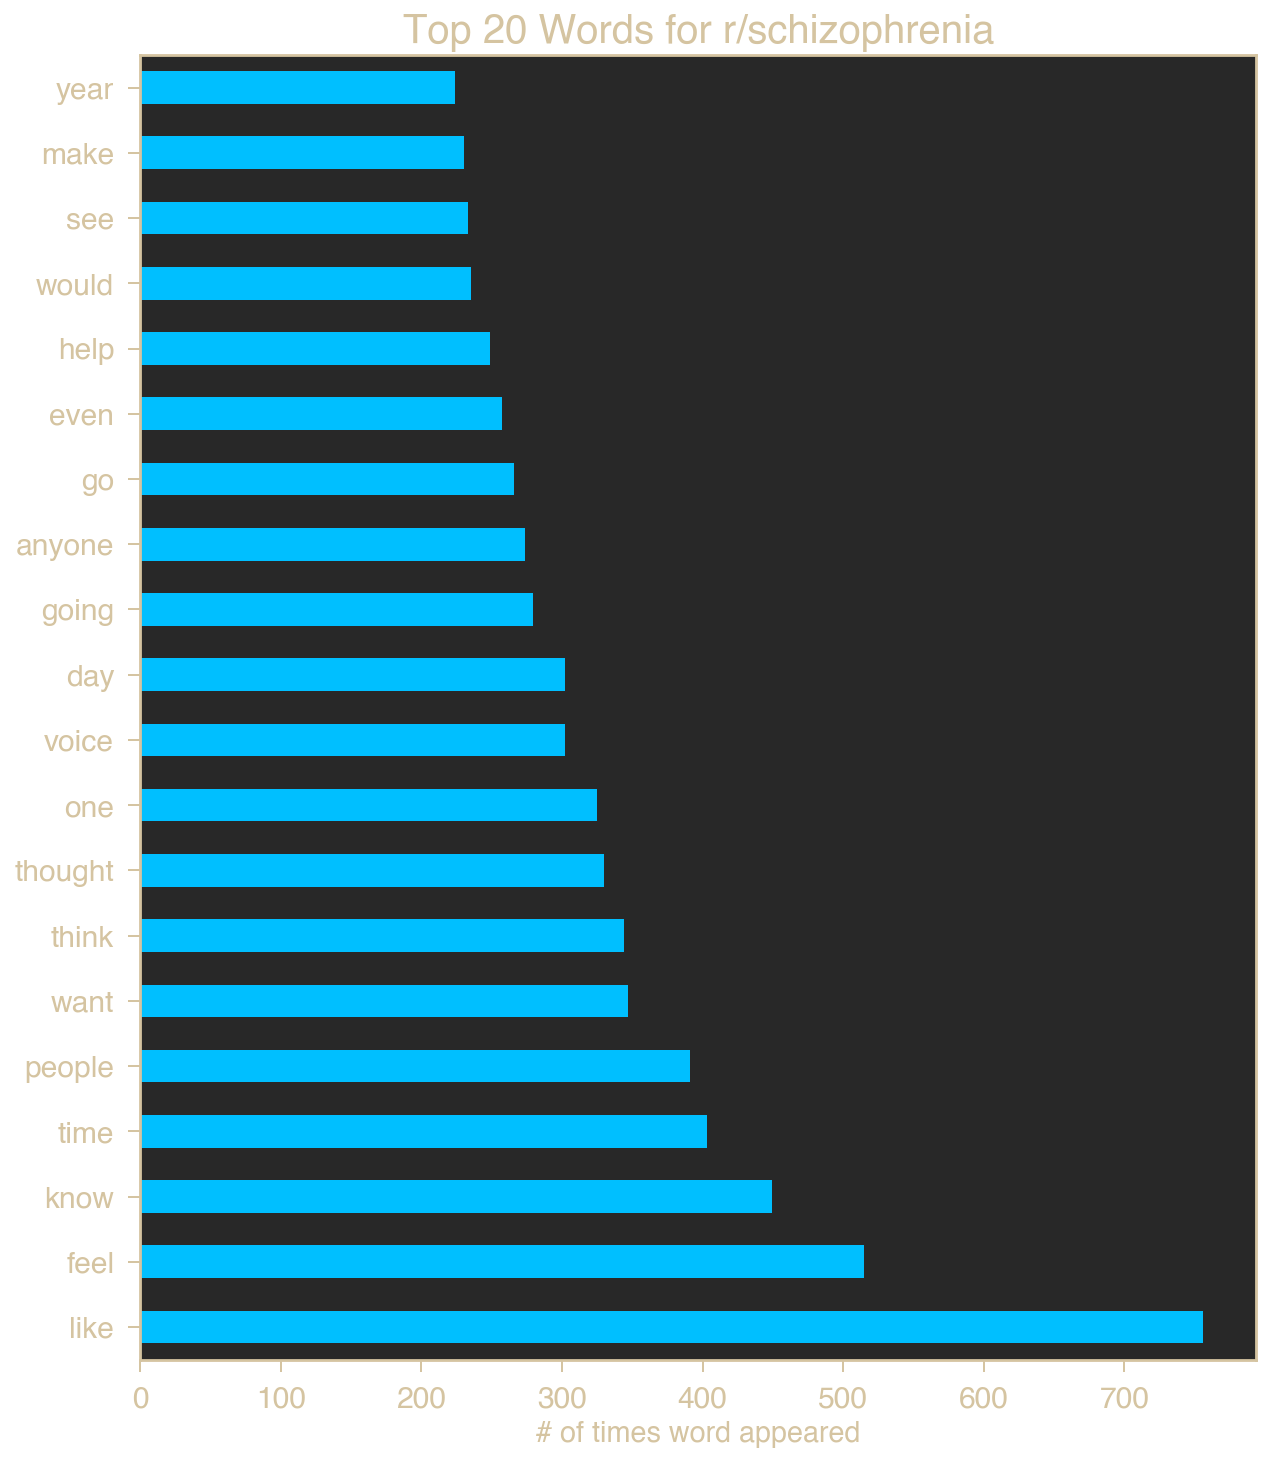

In [40]:
# Plot visualization for the Top 20 words that frequent more than 200 times in schizophrenia subreddit
ax = df_cv_schizophrenia.sum().sort_values(ascending=False).head(20).plot(kind='barh', figsize=(10,12),
                                                                   color="deepskyblue", fontsize=15)
ax.set_title("Top 20 Words for r/schizophrenia", fontsize=20)
ax.set_xlabel('# of times word appeared');

Observations:
- The word 'time' occurs as one of the top 5 words for both subreddits. This is key that there is a common sense of 'time' in that 'time' often is a means to stay rooted, because otherwise, without time, events become too fluid and mashed together which may evoke a feeling of being in limbo.
- The word 'thought' occurring often in schizophrenia subreddit makes sense as schizophreniacs often fear sharing thoughts, especially during the day, for fear of being stigmatized or shunned as the thought may be absurd or related to a hallucination. 
- There are more past tense words in dreams subreddit vs schizophrenia subreddit where individuals may be in a more "present" state of mind. This is great insight as to how perception differs when experiencing a dream versus a psychotic episode. 

### CountVectorized Datasets w/ Bi-Grams

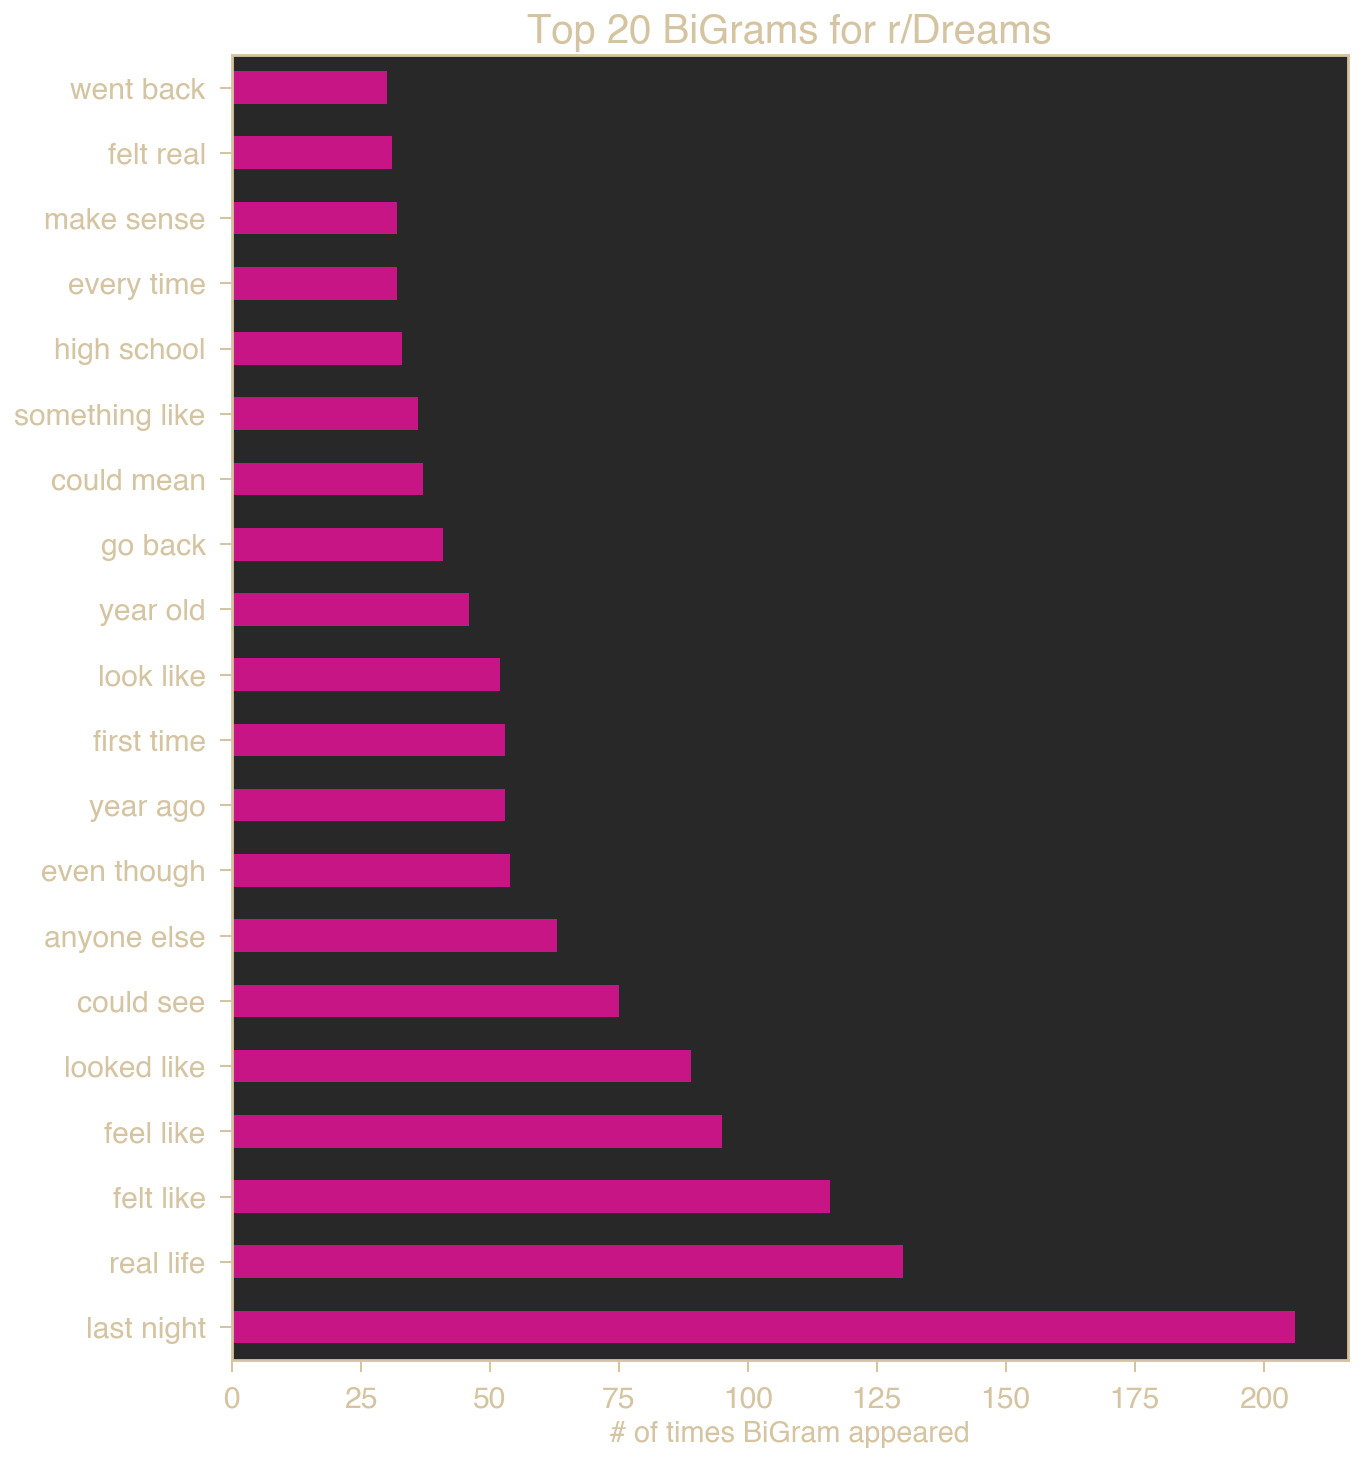

In [41]:
# Plot visualization for the Top 20 word pairs that occur more than 200 times in dreams subreddit
axn = df_cvn_dreams.sum().sort_values(ascending=False).head(20).plot(kind='barh', figsize=(10,12),
                                                                   color="mediumvioletred", fontsize=15)
axn.set_title("Top 20 BiGrams for r/Dreams", fontsize=20)
axn.set_xlabel('# of times BiGram appeared');

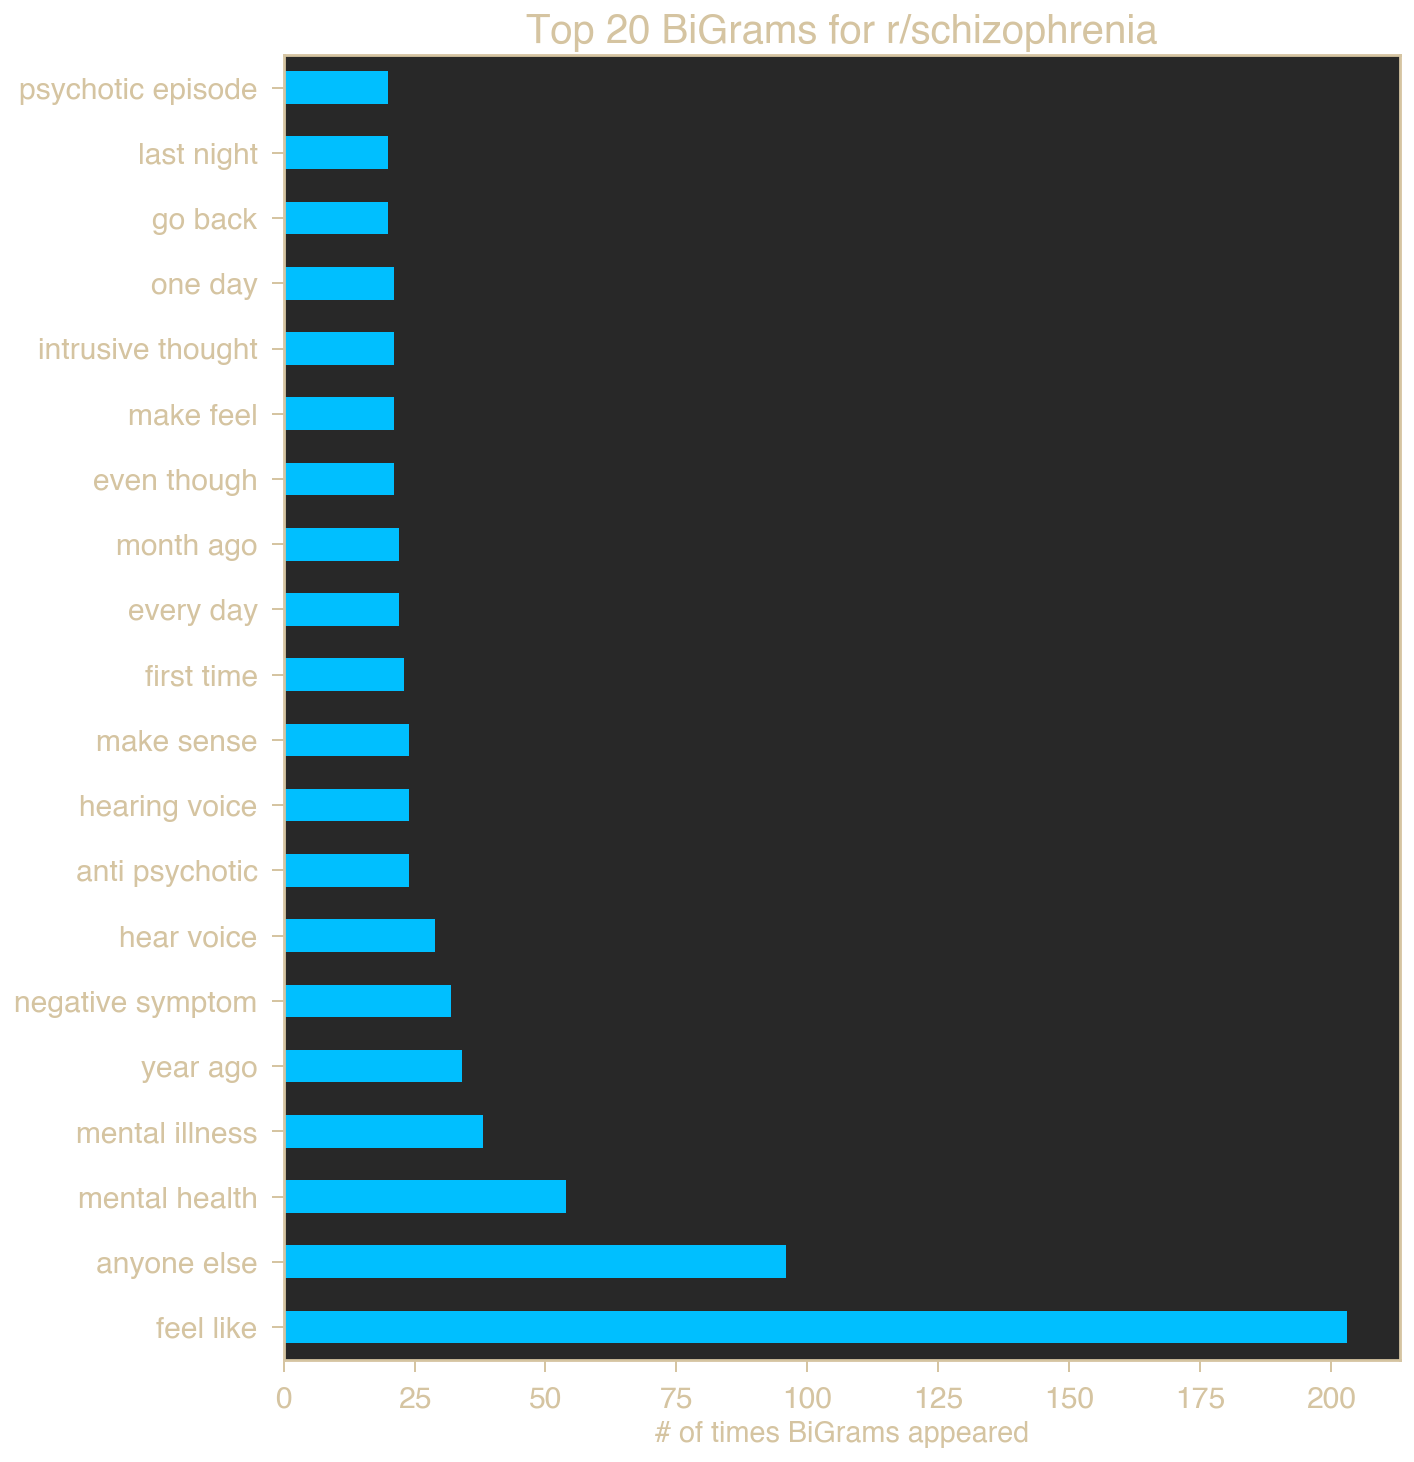

In [42]:
# Plot visualization for the Top 20 word pairs that occur more than 200 times in schizophrenia subreddit
axn = df_cvn_schizophrenia.sum().sort_values(ascending=False).head(20).plot(kind='barh', figsize=(10,12),
                                                                   color="deepskyblue", fontsize=15)
axn.set_title("Top 20 BiGrams for r/schizophrenia", fontsize=20)
axn.set_xlabel('# of times BiGrams appeared');

#### Export Data to CSV

Save file of cleaned data to the processed directory to be read and used for further analysis in Notebook 4.

In [43]:
# Export cleaned dataset for Model Fit step in Notebook 4
df_subreddits.to_csv(r'cleaned_subreddits.csv')